#Overview
Here we will be doing spatial and Time series analysis on San Francisco crimes

#Datasets
I use [Police Department Incident Reports](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry/). This dataset covers crime incidents from year 2003 to year 2018. It has 2.21M rows and 13 columns. Each row is each incident. Schema includes IncidntNum, Category, Descript, DayOfWeek, Date, Time, PdDistrict, Resolution, Address, X, Y, Location, PdId]

#Getting dataset

In [3]:
# read dataset
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/content/sf_03_18.csv")

('/content/sf_03_18.csv', <http.client.HTTPMessage at 0x7f74eb224c50>)

we check the file has been downloded

In [6]:
import os

with os.scandir('/content/') as entries:
    for entry in entries:
        print(entry.name)

.config
sf_03_18.csv
sample_data


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


#Data Exploration
At first, we do some basic operations on the dataset.

In [0]:
df = pd.read_csv('sf_03_18.csv')

In [9]:
df.shape

(2215024, 33)

In [10]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,:@computed_region_yftq_j783,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,:@computed_region_bh8s_q3mv,:@computed_region_fyvs_ahh9,:@computed_region_9dfj_4gjx,:@computed_region_n4xg_c4py,:@computed_region_4isq_27mq,:@computed_region_fcz8_est8,:@computed_region_pigm_ib2e,:@computed_region_9jxd_iqea,:@computed_region_6pnf_4xz7,:@computed_region_6ezc_tdp2,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_2dwj_jsy4
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000,42.0,10.0,8.0,16.0,1.0,8.0,4.0,64.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010,32.0,5.0,10.0,34.0,14.0,2.0,9.0,28853.0,34.0,NaN,1.0,NaN,1.0,NaN,7.0,2.0,1.0,1.0,1.0,35.0
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200,38.0,3.0,5.0,5.0,15.0,4.0,5.0,28862.0,3.0,1.0,NaN,1.0,5.0,1.0,9.0,1.0,NaN,NaN,5.0,NaN
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016,53.0,3.0,5.0,20.0,8.0,4.0,5.0,28859.0,19.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200,53.0,3.0,2.0,20.0,2.0,4.0,7.0,28859.0,19.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN



We can see that X and Y are the Longitude and Latitude of the incident location, we also have one column named Location.



In [13]:
df.dtypes

IncidntNum                        int64
Category                         object
Descript                         object
DayOfWeek                        object
Date                             object
Time                             object
PdDistrict                       object
Resolution                       object
Address                          object
X                               float64
Y                               float64
Location                         object
PdId                              int64
SF Find Neighborhoods           float64
Current Police Districts        float64
Current Supervisor Districts    float64
Analysis Neighborhoods          float64
:@computed_region_yftq_j783     float64
:@computed_region_p5aj_wyqh     float64
:@computed_region_rxqg_mtj9     float64
:@computed_region_bh8s_q3mv     float64
:@computed_region_fyvs_ahh9     float64
:@computed_region_9dfj_4gjx     float64
:@computed_region_n4xg_c4py     float64
:@computed_region_4isq_27mq     float64


After that we should also check if there is any missing values in the data frame.



In [14]:
df.isnull().sum()

IncidntNum                            0
Category                              0
Descript                              0
DayOfWeek                             0
Date                                  0
Time                                  0
PdDistrict                            1
Resolution                            0
Address                               0
X                                     0
Y                                     0
Location                              0
PdId                                  0
SF Find Neighborhoods              6077
Current Police Districts           1112
Current Supervisor Districts        661
Analysis Neighborhoods             1057
:@computed_region_yftq_j783        5580
:@computed_region_p5aj_wyqh        1523
:@computed_region_rxqg_mtj9         661
:@computed_region_bh8s_q3mv         495
:@computed_region_fyvs_ahh9        1057
:@computed_region_9dfj_4gjx     1666617
:@computed_region_n4xg_c4py     1894819
:@computed_region_4isq_27mq     1650528


There is only one missing value in the dataframe, in PdDistrict column.



In [16]:
df.Location[df.PdDistrict.isnull()]

1031781    POINT (-122.4133519852842 37.70820245849022)
Name: Location, dtype: object

We can search the corresponding PdDistrict by Adress even though the location is missing. The 10 police station map of SF can be found [here](http://sanfranciscopolice.org/police-district-maps) (or we can search by google map).

After Checking this location with Google map and comparing with the police stations map, we can conclude that is should be in the "INGLESIDE" district.

In [0]:
df.PdDistrict.fillna("INGLESIDE", inplace=True)

Check if there is still any missing value after fillling in.



In [18]:
df.isnull().sum()

IncidntNum                            0
Category                              0
Descript                              0
DayOfWeek                             0
Date                                  0
Time                                  0
PdDistrict                            0
Resolution                            0
Address                               0
X                                     0
Y                                     0
Location                              0
PdId                                  0
SF Find Neighborhoods              6077
Current Police Districts           1112
Current Supervisor Districts        661
Analysis Neighborhoods             1057
:@computed_region_yftq_j783        5580
:@computed_region_p5aj_wyqh        1523
:@computed_region_rxqg_mtj9         661
:@computed_region_bh8s_q3mv         495
:@computed_region_fyvs_ahh9        1057
:@computed_region_9dfj_4gjx     1666617
:@computed_region_n4xg_c4py     1894819
:@computed_region_4isq_27mq     1650528


No missing values!

**Let's take a look at the distribution of the incidents across the values in some columns(features).**
###1. Category

In [19]:
df.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
NON-CRIMINAL                   238323
ASSAULT                        194694
VEHICLE THEFT                  126602
DRUG/NARCOTIC                  119628
VANDALISM                      116059
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19449
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
DISORDERLY CONDUCT              10040
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS 

LARCENY/THEFT incidents are the most, which is not very surprising. If we also count VEHICLE THEFT, there are about 600k theft incidents, or 27% of all the incidents.

###2. DayOfWeek

In [20]:
df.DayOfWeek.value_counts()

Friday       337941
Wednesday    324020
Saturday     320593
Thursday     316156
Tuesday      315135
Monday       306587
Sunday       294592
Name: DayOfWeek, dtype: int64

As consequence, Friday is the day with the most incidents.

###3. PdDistrict¶

In [63]:
df.PdDistrict.value_counts()

SOUTHERN      399785
MISSION       300076
NORTHERN      272713
CENTRAL       226255
BAYVIEW       221000
INGLESIDE     194181
TENDERLOIN    191746
TARAVAL       166971
PARK          125479
RICHMOND      116818
Name: PdDistrict, dtype: int64

Based on the map, SOUTHERN, NORTHERN, MISSION, CENTRAL stations basically cover the north-eastern part of SF, the total amount of incidents implies these areas above are indeed the most dangerous areas, we will also discuss this part in detail later.

###4. Resolution

In [22]:
df.Resolution.value_counts()

NONE                                      1389500
ARREST, BOOKED                             524979
ARREST, CITED                              154789
LOCATED                                     34463
PSYCHOPATHIC CASE                           29185
UNFOUNDED                                   23799
JUVENILE BOOKED                             14158
COMPLAINANT REFUSES TO PROSECUTE             8089
DISTRICT ATTORNEY REFUSES TO PROSECUTE       7955
NOT PROSECUTED                               7720
JUVENILE CITED                               6587
PROSECUTED BY OUTSIDE AGENCY                 5070
EXCEPTIONAL CLEARANCE                        4258
JUVENILE ADMONISHED                          3004
JUVENILE DIVERTED                             694
CLEARED-CONTACT JUVENILE FOR MORE INFO        689
PROSECUTED FOR LESSER OFFENSE                  85
Name: Resolution, dtype: int64

Over half of the cases are not resolved (None).

We are also curious about if there are seasonal effect. What is the variation across different months?

In [23]:
#dataframe conversion
#convert "date" into a fro mof "yyy-mm-dd" and create another column "month" for later use
df.Date = df.Date.map(lambda x:x.split('/')[2] + '-' + x.split('/')[0] + '-' + x.split('/')[1])
df['Month'] = df.Date.map(lambda x: int(x.split('-')[1]))

#count the number of incidents for each month
monthly_count = df.Month.value_counts()
monthly_count


1     197584
3     197580
10    190470
4     189834
5     187747
8     187379
9     183437
7     181822
2     178619
11    175032
6     174744
12    170776
Name: Month, dtype: int64

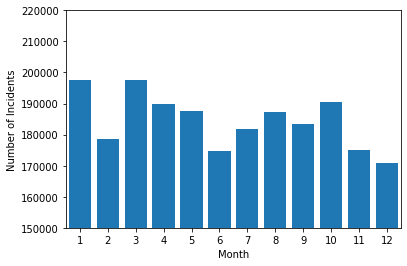

In [27]:
#draw  bar plot
fig = plt.figure()
plt.bar(sorted(monthly_count.index), monthly_count.values[np.argsort(monthly_count.index)])
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xlim(0.5, 12.5)
plt.ylim(150000, 220000)
plt.xticks(np.arange(1, 13))
plt.show()

I expected that the holiday season, November and December, would have the least incidents. The result shows there are indeed less incidents in this two months.

But actually, the above distribution is unconvincing since we only have data till May in 2018, so actually we need to just include the data before 2018 (with while year records).

In [28]:
#drop out the data in 2018
monthly_count_drop = df.Month[df.Date < '2018'].value_counts()
monthly_count_drop

10    190470
8     187379
3     186840
1     185553
5     184103
9     183437
7     181822
4     179528
11    175032
6     174744
12    170776
2     168672
Name: Month, dtype: int64

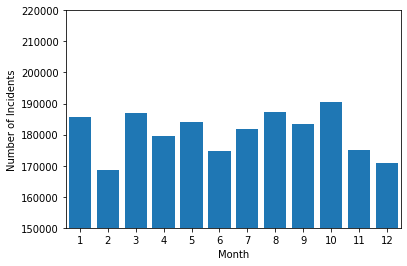

In [30]:
# draw a bar plot and drop out the data in 2018
fig = plt.figure()
plt.bar(sorted(monthly_count_drop.index), monthly_count_drop.values[np.argsort(monthly_count_drop.index)])
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xlim((0.5,12.5))
plt.ylim((150000,220000))
plt.xticks(np.arange(1, 13))
plt.show()

After dropping out the data in 2018, we can tell there are apparently lower incident rate in Febrary. But overall, the incident rate in the whole year is close.

How about the variation across different times of a day?

In [0]:
# Convert the time to floating point numbers between 0 and 24
df['Time_float'] = df.Time.map(lambda x: int(x.split(':')[0]) + float(x.split(':')[1])/60)

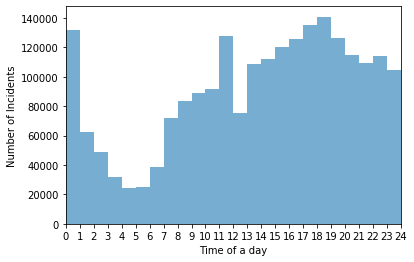

In [32]:
fig = plt.figure()
plt.hist(df.Time_float, bins = 24, alpha = 0.6)
plt.xlabel('Time of a day')
plt.ylabel('Number of Incidents')
plt.xlim((0.0, 24))
plt.xticks(np.arange(0, 25))
plt.show()

From the plot above, we can tell that there are more crimes in the afternoon and evening than morning. And of course, less incidents happened during the sleeping times.

###Spatial Distribution
By longitude and latitude, we can visualize the distribution of all the incidents.

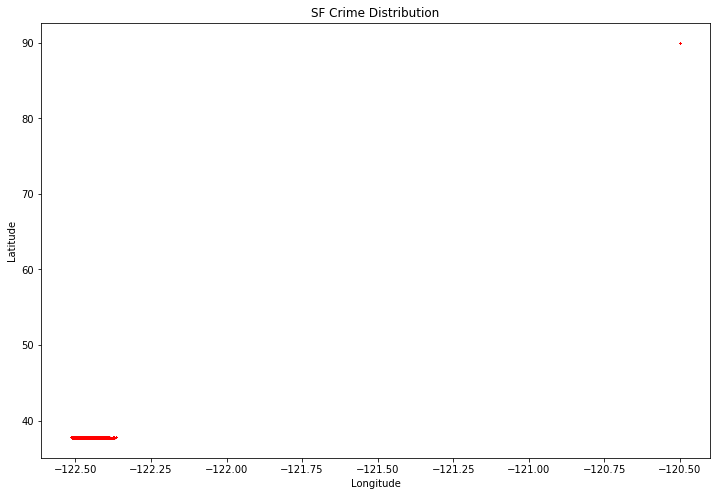

In [33]:
fig = plt.figure(figsize = (12,8))
plt.title('SF Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(df.X, df.Y, s=0.02,c='r')
plt.show()

What is out of our expectation is that, there is one ourlier in the location dictribution, which might be a mistake by thepolice department by deduction. So here we just remove this point from the dataframe for better visualization and further analysis.

In [0]:
df_new = df[df['Y'] < 80]


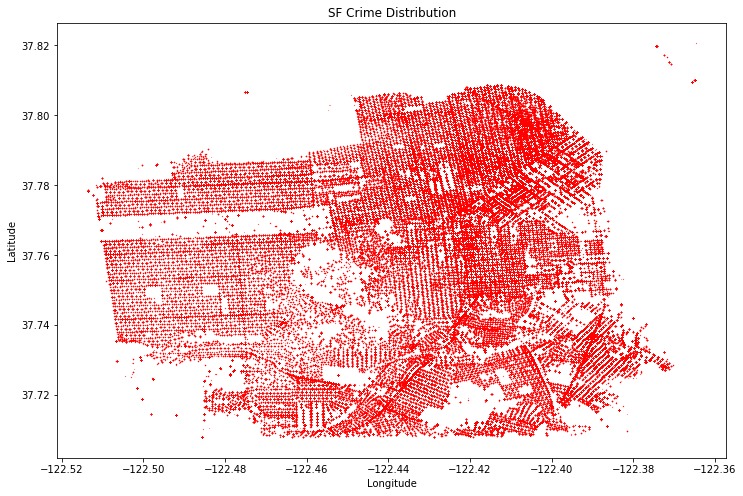

In [35]:
fig = plt.figure(figsize = (12,8))
plt.title('SF Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(df_new.X, df_new.Y, s=0.02,c='r')
plt.show()

We can see there are more crimes in the north-eastern part of SF, which is corresponding to our earlier observation.

In [36]:
print('The first date:', df.Date.min())

The first date: 2003-01-01


In [37]:
print('The first date:', df.Date.max())

The first date: 2018-05-15


The data are from 2003 to 2018, so we will analyze the record between 2003 and 2018 (over 15 years).

I also wonder if this is always the case over the 15 years. Therefore let's see if the distribution has any significant change over time. To reduce computation time and avoid duplicate work, I'll take data of April each year as example. Also to better understand the spatial distribution, this time I use overlaied contours on the scatter plots as well for visualization.

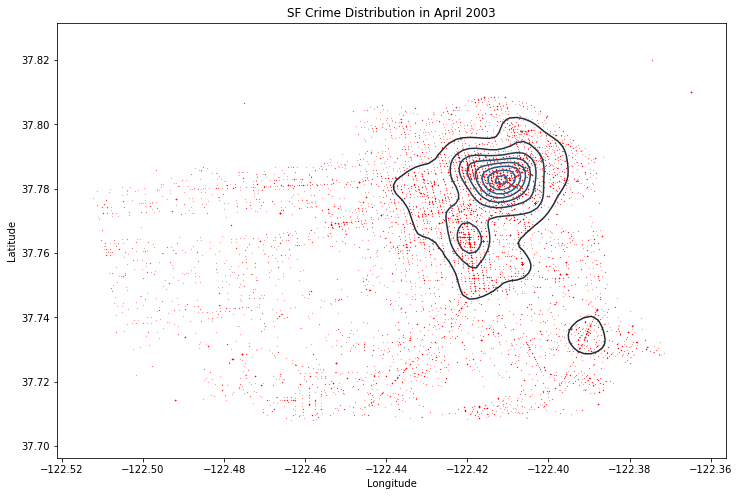

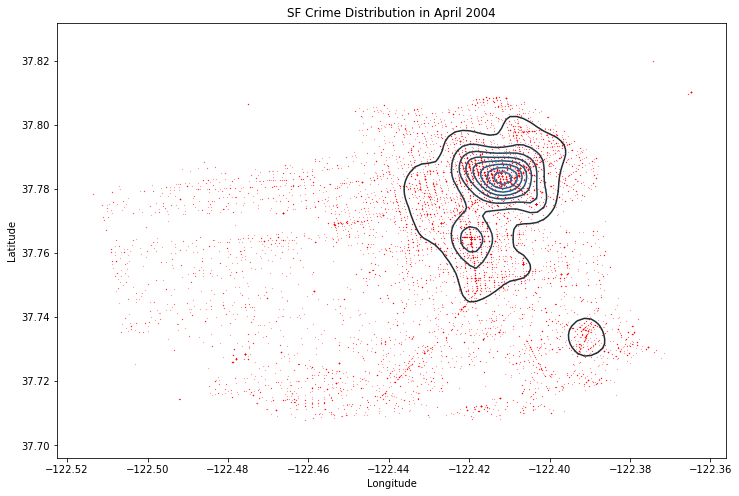

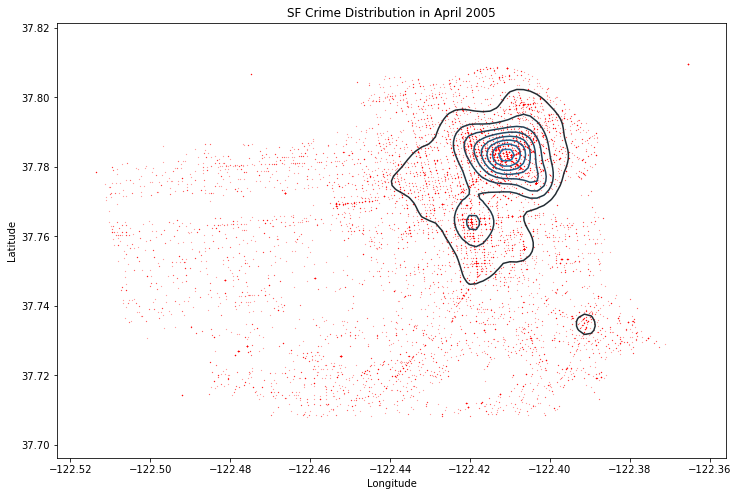

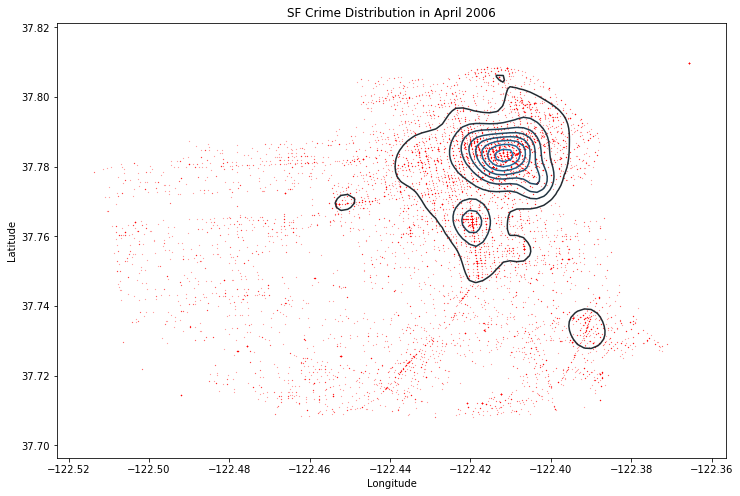

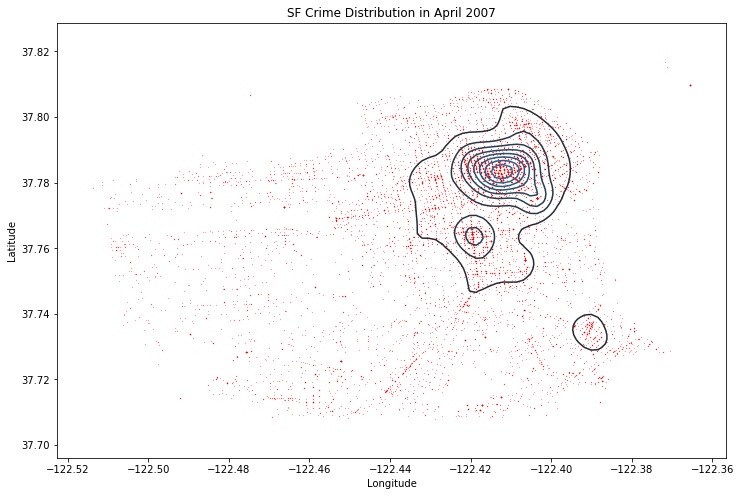

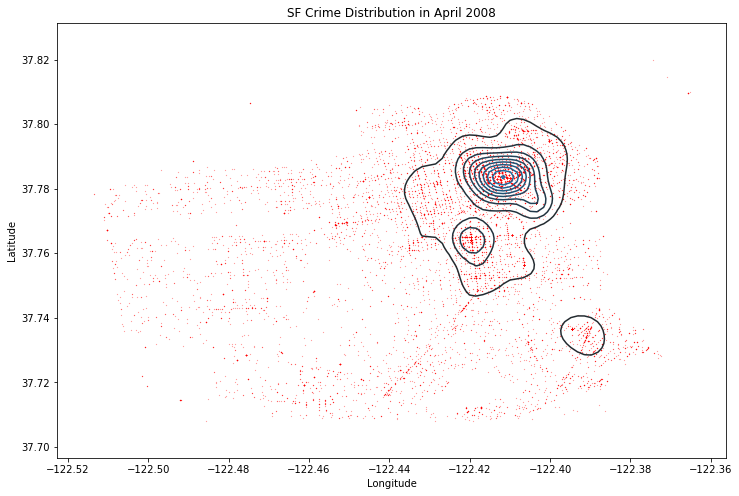

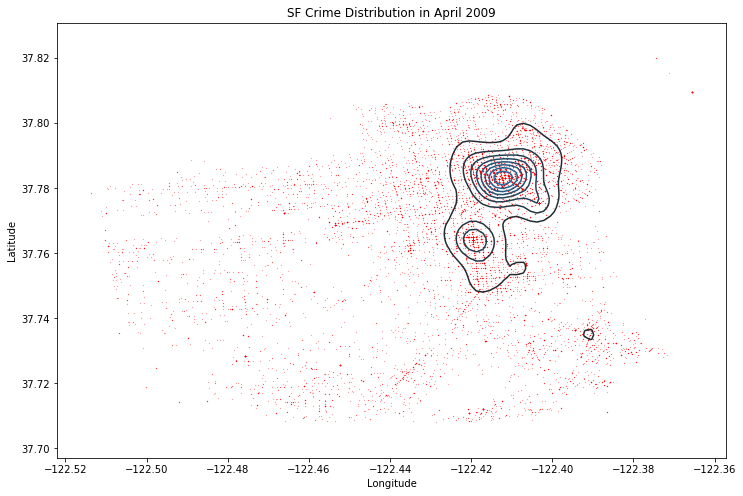

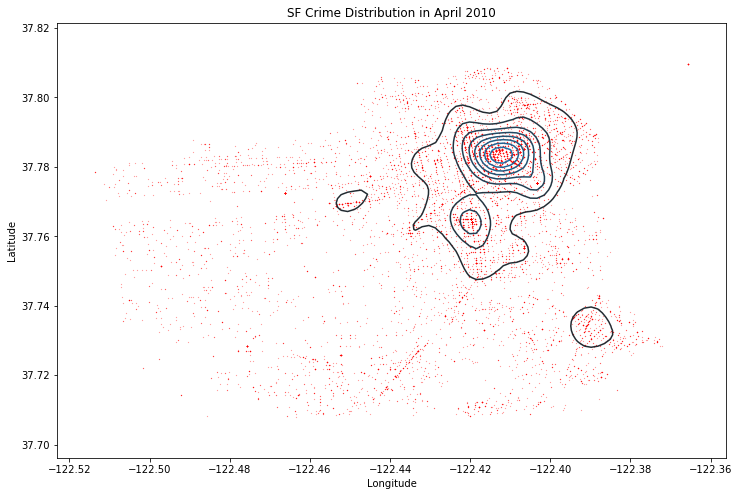

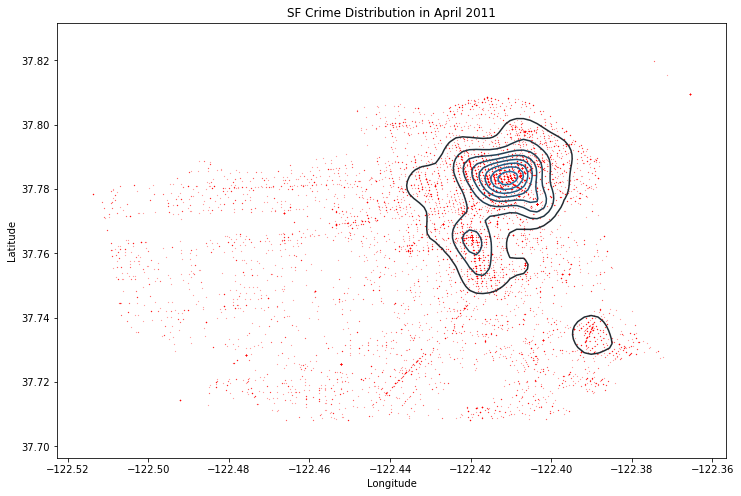

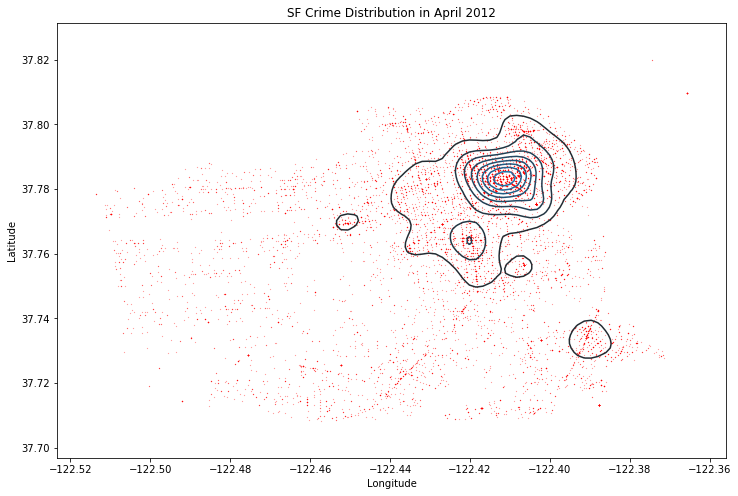

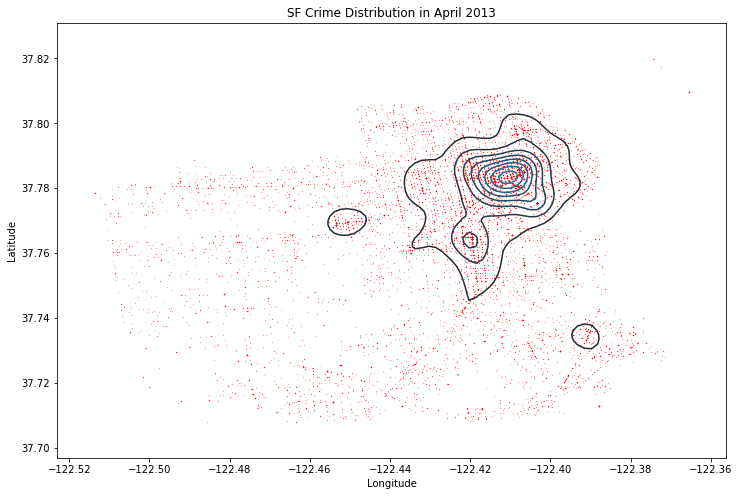

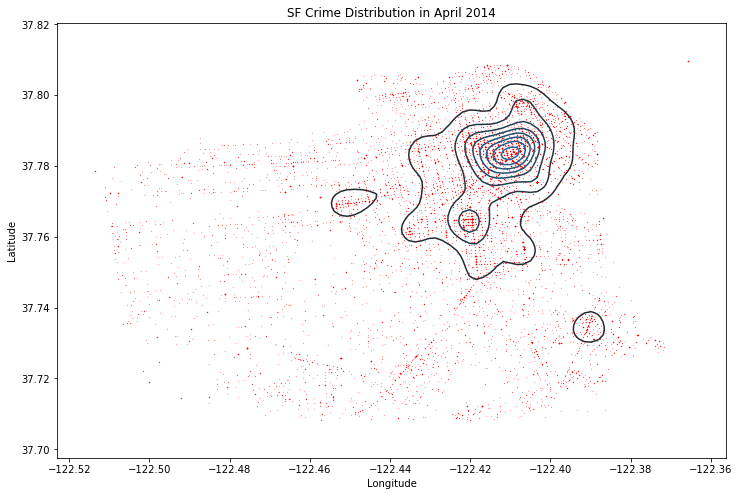

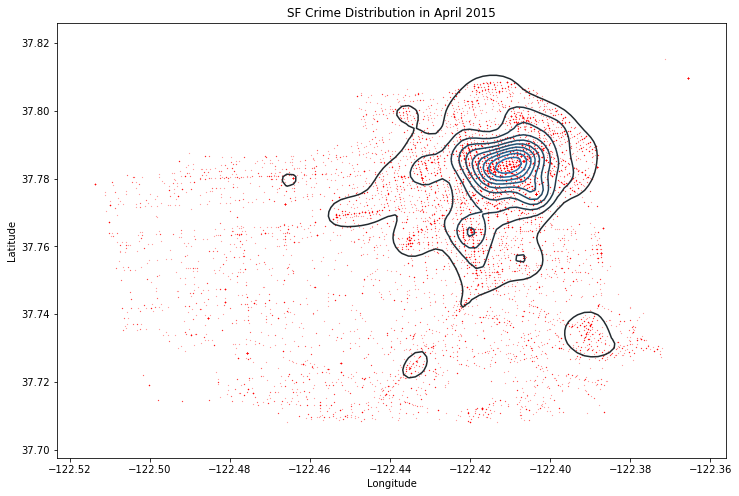

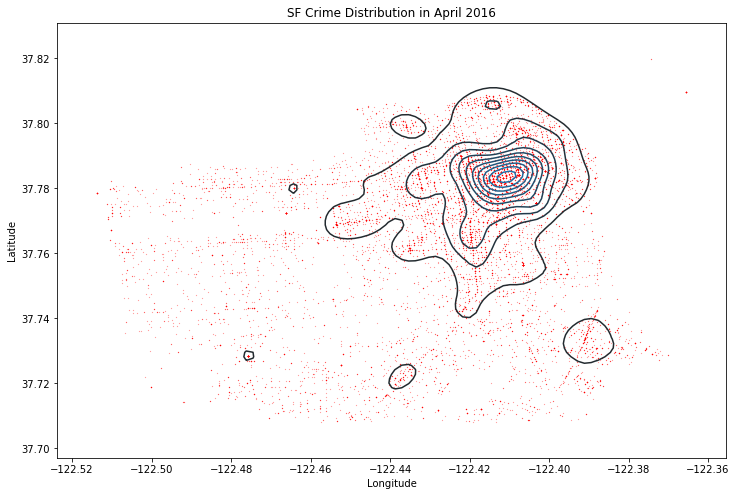

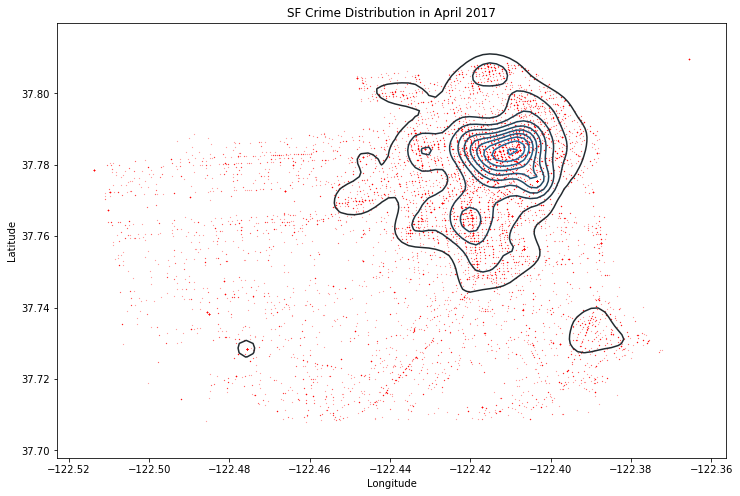

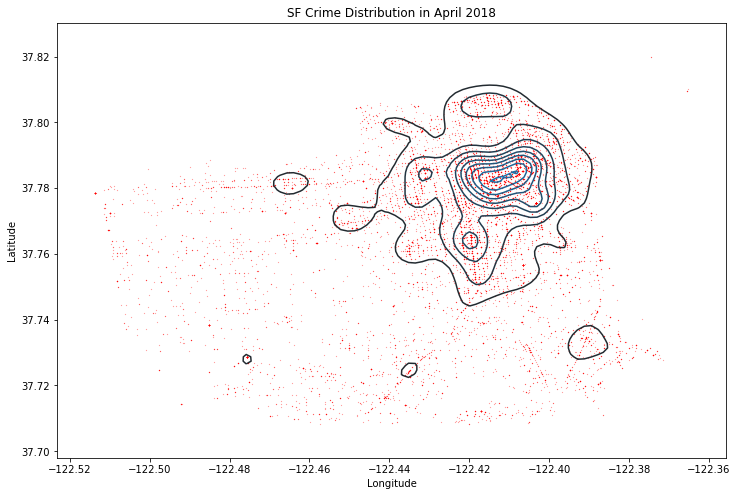

In [38]:
for year in range(2003, 2019):
    df_Jan = df_new[(df_new['Date'] < str(year) + '-02') & (df_new['Date'] > str(year-1) + '-12-31')]
    fig = plt.figure(figsize = (12,8))
    plt.title('SF Crime Distribution in April ' + str(year))
    plt.scatter(df_Jan.X, df_Jan.Y, s = 0.02, c = 'r')
    sns.kdeplot(df_Jan.X, df_Jan.Y)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

So it looks like it the north-eastern part of SF has always been the most dangerous area since 2003. In addition, the contours show that the distribution of crimes around this area has expanded a bit toward its west and south sides since 2015.

###Time Series
Before we start the analysis, we should check what the dataset covers exactly.

In [39]:
print("There should be a total of %s days"%((pd.to_datetime('2018-05-15') - pd.to_datetime('2003-01-01')).days + 1))

There should be a total of 5614 days


To produce time series data, we basically have to count the number of records for each date. If there are no rows for a certain date, we will still have to produce a data point for this date with a count of zero.

In [0]:
time_span = pd.date_range('2003-01-01', '2018-05-15')

# Convert the data frame to time series data
def df_to_TimeSeries(df):
    date = pd.to_datetime(df.Date.value_counts().index)
    index = sorted(date)
    data = df.Date.value_counts().values[np.argsort(date)]
    ts = pd.DataFrame(data = data, index = index, columns = ['count'])
    # if a date within the time span does not exist, fill it in with count = 0
    ts = ts.reindex(time_span, fill_value=0)
    return ts

In [0]:
all_counts = df_to_TimeSeries(df)


In [42]:
# check is there is any date with count = 0
all_counts[all_counts['count'] == 0]

,count
2009-06-10,0


Maybe 2019-06-10 is a peaceful day in the history, but actually it may just be mistaked by SFPD.

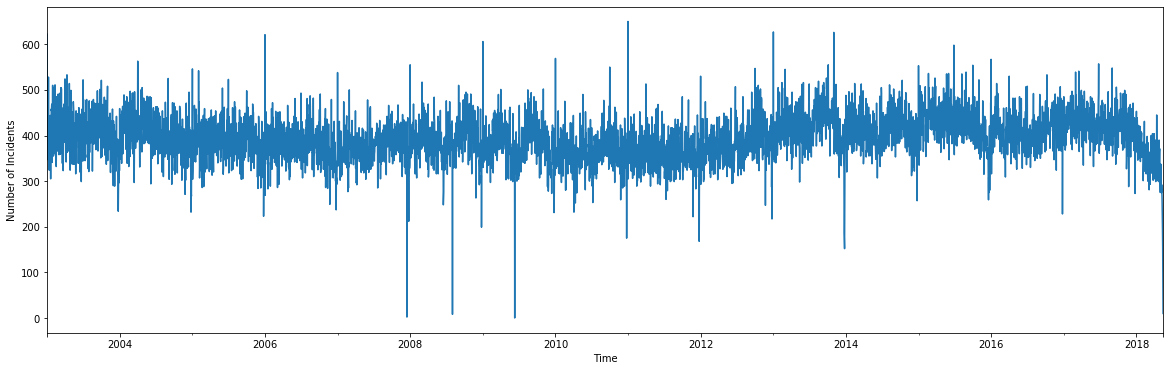

In [43]:
# plot the time series
fig = plt.figure(figsize = (20, 6))
all_counts['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of Incidents')
plt.show()

It looks like the crime rate doesn't change a lot over these years. Is this also true for individual categories? Let take LARCENY/THEFT as example.

In [44]:
df_theft = df.loc[(df['Category'] == 'LARCENY/THEFT'), :]
theft_counts = df_to_TimeSeries(df_theft)
theft_counts[theft_counts['count'] == 0]

,count
2007-12-16,0
2009-06-10,0
2018-05-15,0


2007-12-16 and 2009-06-10 might be peaceful days without LARCENY/THEFT incidents. 2018-05-15 might also be a peaceful day. But it is more likely that due to 2018-05-15 is the last day in the dataset, the record of LARCENY/THEFT wasn't count in.

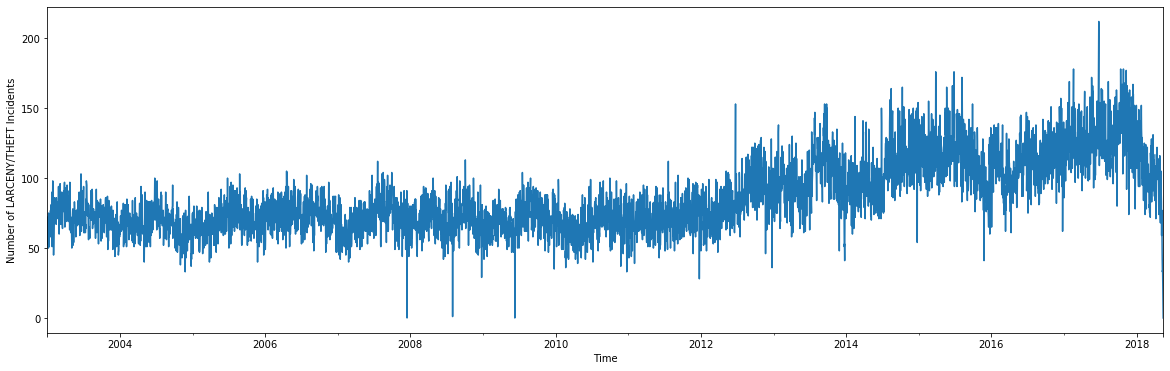

In [45]:
fig = plt.figure(figsize=(20,6))
theft_counts['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of LARCENY/THEFT Incidents')
plt.show()


So the numbers of LARCENY/THEFT Incidents, the most dominant type of crimes, have actually increased since around 2012. I guess this is due to more and more extreme wealth inequality in SF.

Since the total crime rate doesn't really change over these years, there should be some categories whose numbers are decreasing. Let's try ASSAULT this time.

In [46]:
df_assault = df.loc[(df['Category'] == 'ASSAULT'), :]
assault_counts = df_to_TimeSeries(df_assault)
assault_counts[assault_counts['count'] == 0]

,count
2007-12-16,0
2008-08-01,0
2009-06-10,0
2018-05-15,0


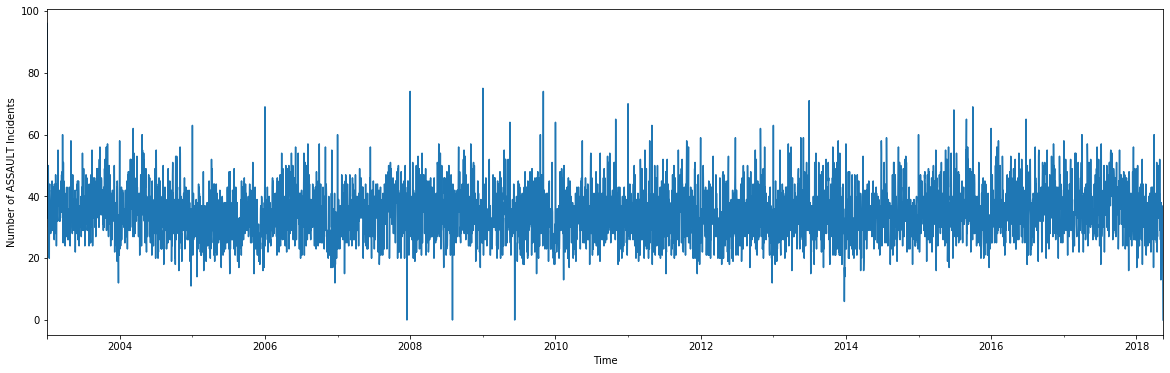

In [47]:
fig = plt.figure(figsize=(20,6))
assault_counts['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of ASSAULT Incidents')
plt.show()

Actually it doesn't change much. Let's turn to DRUG/NARCOTIC.

In [48]:
df_drug = df.loc[(df['Category'] == 'DRUG/NARCOTIC'), :]
drug_counts = df_to_TimeSeries(df_drug)
drug_counts[drug_counts['count'] == 0]

,count
2007-12-16,0
2008-08-01,0
2009-06-10,0
2017-01-26,0
2017-08-22,0
2017-08-27,0


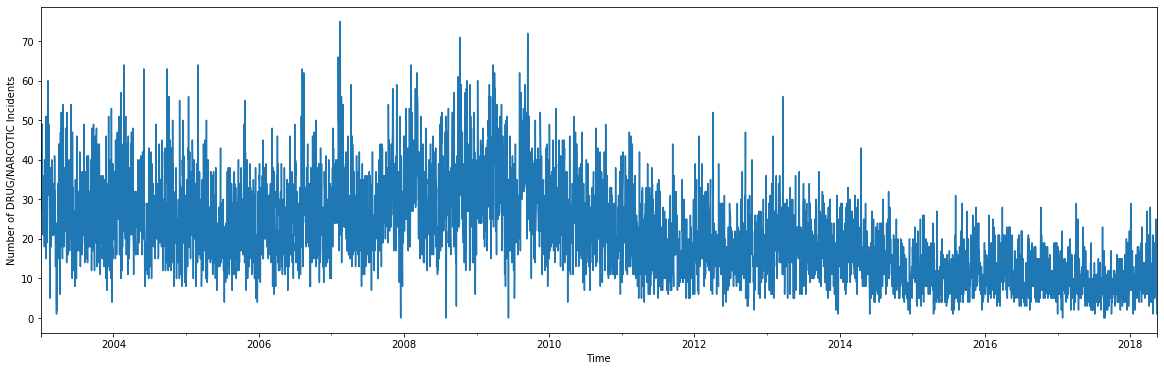

In [49]:
fig = plt.figure(figsize=(20,6))
drug_counts['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of DRUG/NARCOTIC Incidents')
plt.show()

This time, we can see clearly that it has been decreasing and stabilized. The police department probably has a good control of drug crims over these years.

###Takeout & ARIMA model:
All of these crime catagories can be further explored and modeled. Here I will attempt to use a ARIMA model to fit the LARCENY/THEFT data. To reduce the randomness of the data, we can bin the time series into monthly intervals. This strategy is also good if there is a seasonal variation in the data, as 12 months equal a year. Because one year is not a integer of weeks, using weekly intervals for a seasonal ARIMA model does not tend to give a good result.

In [50]:
y = theft_counts.resample('MS').sum()
y.tail()

,count
2018-01-01,3820
2018-02-01,2914
2018-03-01,3104
2018-04-01,2922
2018-05-01,872


Since the data is only recorded till 2018-05-15, I will remove the data of May in 2018.

In [0]:
y = y[:-1]


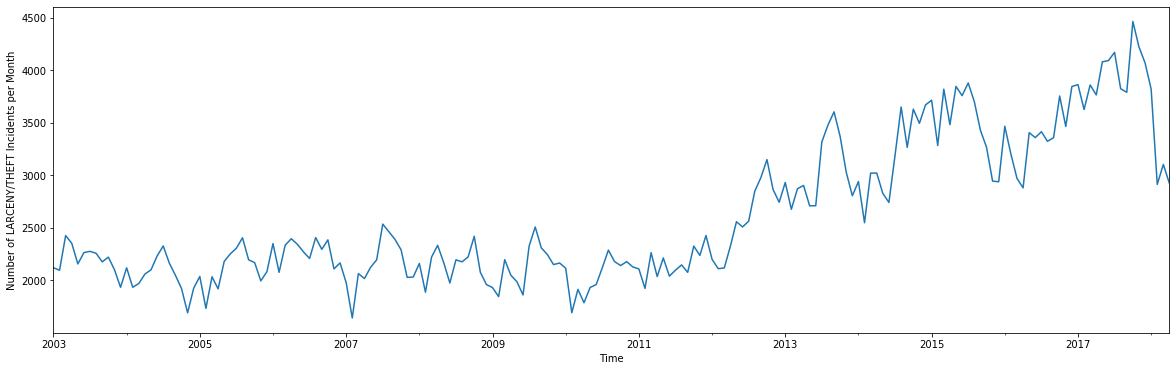

In [52]:
fig = plt.figure(figsize=(20,6))
y['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of LARCENY/THEFT Incidents per Month')
plt.show()

Removing the seasonal component from the time series can lead to a clearer relationship between input and output variables. Let's use the seasonal_decompose function from statsmodels to decompose our data into a trend, a seasonal pattern and the residual.

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

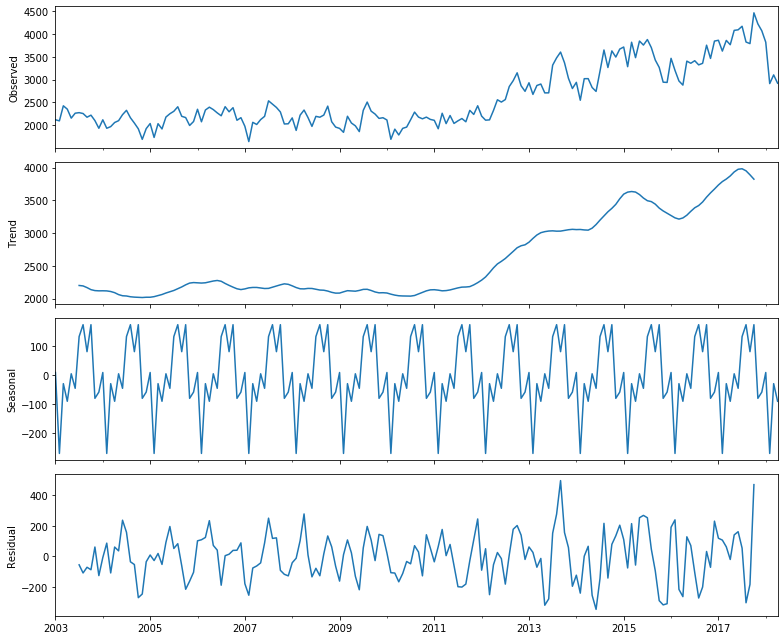

In [54]:
plt.rcParams['figure.figsize'] = 11, 9
decomposition = seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

Based one the residual, it seems that using a seasonal period of one year works good. Therefore, I'll use an seasonal ARIMA model with a seasonal period of one year. I will take the data from the last 12 months as the testing set.

In [0]:
y_past, y_future = y[:-12], y[-12:]


We can use a grid search to find the best hyperparameters of the model. Here I will only explore 0 or 1 for each of the p, d, q, P, D, and Q. Notice that S = 12 because we've decided to use a seasonal period of one year. We use AIC (Akaike Information Criterion) to evalute the performance of each model.

In [0]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [57]:
warnings.filterwarnings("ignore")
aic_min = float("inf")
param = (0,0,0,0,0,0)
best_model = None

for x1 in pdq:
    for x2 in seasonal_pdq:
        try:
            mod = SARIMAX(y_past,
                          order = x1,
                          seasonal_order = x2,
                          enforce_stationarity = False,
                          enforce_invertibility = False)
            results = mod.fit()
            print("(p,d,q,P,D,Q,S) = {}: AIC = {}".format(x1 + x2, results.aic))
            if results.aic < aic_min:
                aic_min = results.aic
                param = x1 + x2
                best_model = mod
        except:
            continue

(p,d,q,P,D,Q,S) = (0, 0, 0, 0, 0, 0, 12): AIC = 3175.8259813524046
(p,d,q,P,D,Q,S) = (0, 0, 0, 0, 0, 1, 12): AIC = 2783.156538604123
(p,d,q,P,D,Q,S) = (0, 0, 0, 0, 1, 0, 12): AIC = 2338.259089233441
(p,d,q,P,D,Q,S) = (0, 0, 0, 0, 1, 1, 12): AIC = 2165.147319915113
(p,d,q,P,D,Q,S) = (0, 0, 0, 1, 0, 0, 12): AIC = 2343.7912133069776
(p,d,q,P,D,Q,S) = (0, 0, 0, 1, 0, 1, 12): AIC = 2306.9576404138434
(p,d,q,P,D,Q,S) = (0, 0, 0, 1, 1, 0, 12): AIC = 2174.559549158229
(p,d,q,P,D,Q,S) = (0, 0, 0, 1, 1, 1, 12): AIC = 2158.8419002941982
(p,d,q,P,D,Q,S) = (0, 0, 1, 0, 0, 0, 12): AIC = 2948.2937219833375
(p,d,q,P,D,Q,S) = (0, 0, 1, 0, 0, 1, 12): AIC = 2600.455781057477
(p,d,q,P,D,Q,S) = (0, 0, 1, 0, 1, 0, 12): AIC = 2236.328800417331
(p,d,q,P,D,Q,S) = (0, 0, 1, 0, 1, 1, 12): AIC = 2061.9210298428297
(p,d,q,P,D,Q,S) = (0, 0, 1, 1, 0, 0, 12): AIC = 2259.85346684256
(p,d,q,P,D,Q,S) = (0, 0, 1, 1, 0, 1, 12): AIC = 2198.03527836701
(p,d,q,P,D,Q,S) = (0, 0, 1, 1, 1, 0, 12): AIC = 2081.7818302854744
(p,d,

In [58]:
print("Best (p,d,q,P,D,Q,S) =", param)


Best (p,d,q,P,D,Q,S) = (1, 1, 1, 1, 1, 1, 12)


So the best model is now chosen, and we can see its best-fitted parameters below.

In [59]:
results = best_model.fit()
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.6553,0.151,4.347,0.000,0.360,0.951
ma.L1,-0.8431,0.110,-7.694,0.000,-1.058,-0.628
ar.S.L12,-0.0423,0.093,-0.457,0.648,-0.224,0.139
ma.S.L12,-0.9886,0.915,-1.080,0.280,-2.783,0.805
sigma2,2.838e+04,2.38e+04,1.193,0.233,-1.83e+04,7.5e+04


We can use the plot_diagnostics method of the model to evaluate the fitting result based on the residuals.

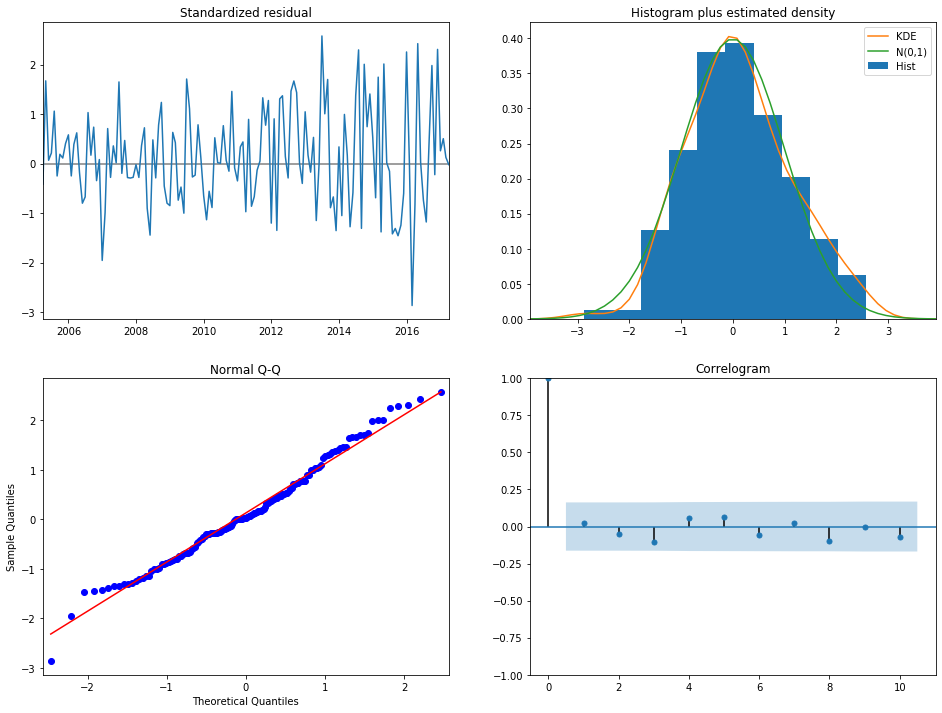

In [60]:
results.plot_diagnostics(figsize=(16, 12))
plt.show()

In [61]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y['count'].values[1:])
print("-- Before taking the difference --")
print ("ADF Statistic:", result[0])
print ("p-value:", result[1])

diff = y.diff()
result = adfuller(diff['count'].values[1:])
print ("-- After taking the difference --")
print ("ADF Statistic:", result[0])
print ("p-value:", result[1])

-- Before taking the difference --
ADF Statistic: -1.0663200681527234
p-value: 0.7283145512232349
-- After taking the difference --
ADF Statistic: -3.5731946624059376
p-value: 0.00629465774645448


We see that the p-value becomes close to zero after taking the difference just once, which rejects the null hypothesis of nonstationarity.

Lastly, we can visually compare the observed time series and the model.

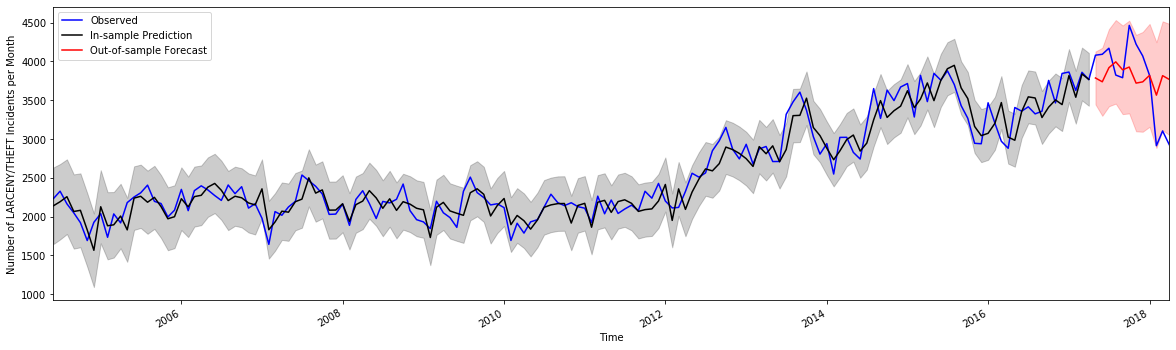

In [62]:
# neglect the beginning of the time series, where the model hasn't converged
pred = results.get_prediction(start = y_past['2004-06':].index[0],  dynamic=False)
pred_ci = pred.conf_int() # 95% confidence interval 

forecast = results.get_forecast(steps=12) # forecast for the next 12 months
forecast_ci = forecast.conf_int() # 95% confidence interval 

fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(y['2004-06':].index, y['2004-06':], label='Observed', color='b')

pred.predicted_mean.plot(ax=ax, label='In-sample Prediction', color='k')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

forecast.predicted_mean.plot(ax=ax, label='Out-of-sample Forecast', color='r')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='r', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('Number of LARCENY/THEFT Incidents per Month')
plt.legend()
plt.show()

We do can see a discrepancy between the observed values and the model for the testing data. However, they are still within a 95% confidence interval of the model prediction.